In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cycle-seoul/submission.csv
/kaggle/input/cycle-seoul/train.csv
/kaggle/input/cycle-seoul/test.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('../input/cycle-seoul/train.csv')
test = pd.read_csv('../input/cycle-seoul/test.csv')

In [4]:
# for null value and scaling 
data_total = pd.concat([train,test])
data_total = data_total.drop(columns=['id','count'])

In [5]:
# Fill null value with mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(data_total)

result = imputer.transform(data_total)

data_total = pd.DataFrame(result)
data_total.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = RobustScaler()
scaler.fit(data_total)
data_total = scaler.transform(data_total)

In [7]:
# Re Split train and test
train_data = data_total[:1459]
test_data = data_total[1459:]

# Train Count
Train_Count = train['count'].to_numpy()

In [8]:
# DNN model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras import metrics

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data,Train_Count, train_size=0.9) 

print(x_train.shape, y_train.shape)

(1313, 9) (1313,)


In [9]:
# flush model
tf.keras.backend.clear_session()

# Make model
model = Sequential()
model.add(Dense(128, activation='relu',input_shape=(9,)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu',input_shape=(9,)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer='Adam', loss='mean_squared_error',metrics=[metrics.mse])

# call back early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4

2022-06-01 04:23:08.004230: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
# Fit modle
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test,y_test),verbose=2)

Epoch 1/100


2022-06-01 04:23:08.256519: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


42/42 - 1s - loss: 17996.6895 - mean_squared_error: 17996.6895 - val_loss: 15264.3701 - val_mean_squared_error: 15264.3701
Epoch 2/100
42/42 - 0s - loss: 8443.7441 - mean_squared_error: 8443.7441 - val_loss: 4009.6760 - val_mean_squared_error: 4009.6760
Epoch 3/100
42/42 - 0s - loss: 5322.8711 - mean_squared_error: 5322.8711 - val_loss: 3532.0198 - val_mean_squared_error: 3532.0198
Epoch 4/100
42/42 - 0s - loss: 4868.7896 - mean_squared_error: 4868.7896 - val_loss: 3324.5156 - val_mean_squared_error: 3324.5156
Epoch 5/100
42/42 - 0s - loss: 4778.8735 - mean_squared_error: 4778.8735 - val_loss: 2826.7314 - val_mean_squared_error: 2826.7314
Epoch 6/100
42/42 - 0s - loss: 4413.4194 - mean_squared_error: 4413.4194 - val_loss: 2885.2769 - val_mean_squared_error: 2885.2769
Epoch 7/100
42/42 - 0s - loss: 4386.2642 - mean_squared_error: 4386.2642 - val_loss: 2722.5530 - val_mean_squared_error: 2722.5530
Epoch 8/100
42/42 - 0s - loss: 4345.1211 - mean_squared_error: 4345.1211 - val_loss: 3024.2

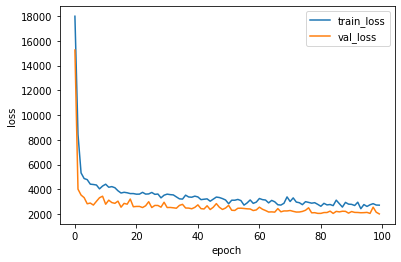

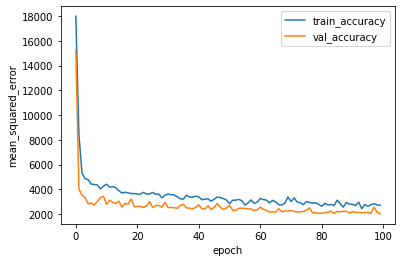

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'])
plt.show()

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train_accuracy','val_accuracy'])
plt.show()

In [12]:
result = model.predict(test_data)
submission = pd.read_csv('../input/cycle-seoul/submission.csv')
submission['count'] = result
submission = submission.set_index('id')
submission.to_csv('submission.csv')